In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import time

In [2]:
starttime = time.time()

In [3]:
# Improting dataset
data = pd.read_csv('./Ml_project_data.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,male,Caucasian,Bachelor,22.927749,No,13.297218,6.327112,1.347214,...,0,0,1.725883,No,No,No,Yes,No,No,XXXConfid
1,4752,89,male,Caucasian,NaN,26.827681,No,4.542524,7.619885,0.518767,...,0,0,2.592424,No,No,No,No,Yes,No,XXXConfid
2,4753,73,male,Other,High School,17.795882,No,19.555085,7.844988,1.826335,...,0,0,7.119548,No,Yes,No,Yes,No,No,XXXConfid
3,4754,74,female,Caucasian,High School,33.800817,Yes,12.209266,8.428001,7.435604,...,0,1,6.481226,No,No,No,No,No,No,XXXConfid
4,4755,89,male,Caucasian,NaN,20.716974,No,18.454356,6.310461,0.795498,...,0,0,0.014691,No,No,Yes,Yes,No,No,XXXConfid


### Exploratory Data analysis

In [4]:
data.describe()

,PatientID,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,27.655697,10.039442,4.920202,4.993138,7.051081,0.252210,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,0.208004,0.156817,4.982958
std,620.507185,8.990221,7.217438,5.757910,2.857191,2.909055,1.763573,0.434382,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,0.405974,0.363713,2.949775
min,4751.000000,60.000000,15.008851,0.002003,0.003616,0.009385,4.002629,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.000000,0.000000,0.001288
25%,5288.000000,67.000000,21.611408,5.139810,2.570626,2.458455,5.482997,0.000000,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,0.000000,0.000000,2.342836
50%,5825.000000,75.000000,27.823924,9.934412,4.766424,5.076087,7.115646,0.000000,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,0.000000,0.000000,5.038973
75%,6362.000000,83.000000,33.869778,15.157931,7.427899,7.558625,8.562521,1.000000,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,0.000000,0.000000,7.581490
max,6899.000000,90.000000,39.992767,19.989293,9.987429,9.998346,9.999840,1.000000,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,1.000000,1.000000,9.999747


In [5]:
data.info()
# Print categorical data cols
categorical_data = data.select_dtypes(include=['object']).columns
# Print numeric data cols
numeric_data = data.select_dtypes(include=['int64', 'float64']).columns
print('Categorical data columns:')
for d in categorical_data:
  print(d, end=', ')
print()
print('Numeric data columns:')
for d in numeric_data:
  print(d, end=', ')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   object 
 3   Ethnicity                  2149 non-null   object 
 4   EducationLevel             1703 non-null   object 
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   object 
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   object 
 13  Diabetes                   2149 non-null   objec

1.   **Categorical data:**

    Gender, Ethnicity, EducationLevel, Smoking, CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension, Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, Forgetfulness, Diagnosis, DoctorInCharge


2.   **Numeric data:**

    Unnamed: 0, PatientID, Age, BMI, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, FamilyHistoryAlzheimers, SystolicBP, DiastolicBP, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL



In [6]:
# removing Unnamed: 0, PatientID, FamilyHistoryAlzheimers, MemoryComplaints, BehavioralProblems, because they are either redundant or categorical but encoded
numeric_features = [feature for feature in numeric_data if feature not in ['Unnamed: 0', 'PatientID', 'FamilyHistoryAlzheimers', 'MemoryComplaints', 'BehavioralProblems']]
print(numeric_features)
print(len(numeric_features))

['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
15


In [7]:
custom_palette = sns.color_palette("Set2", 5)

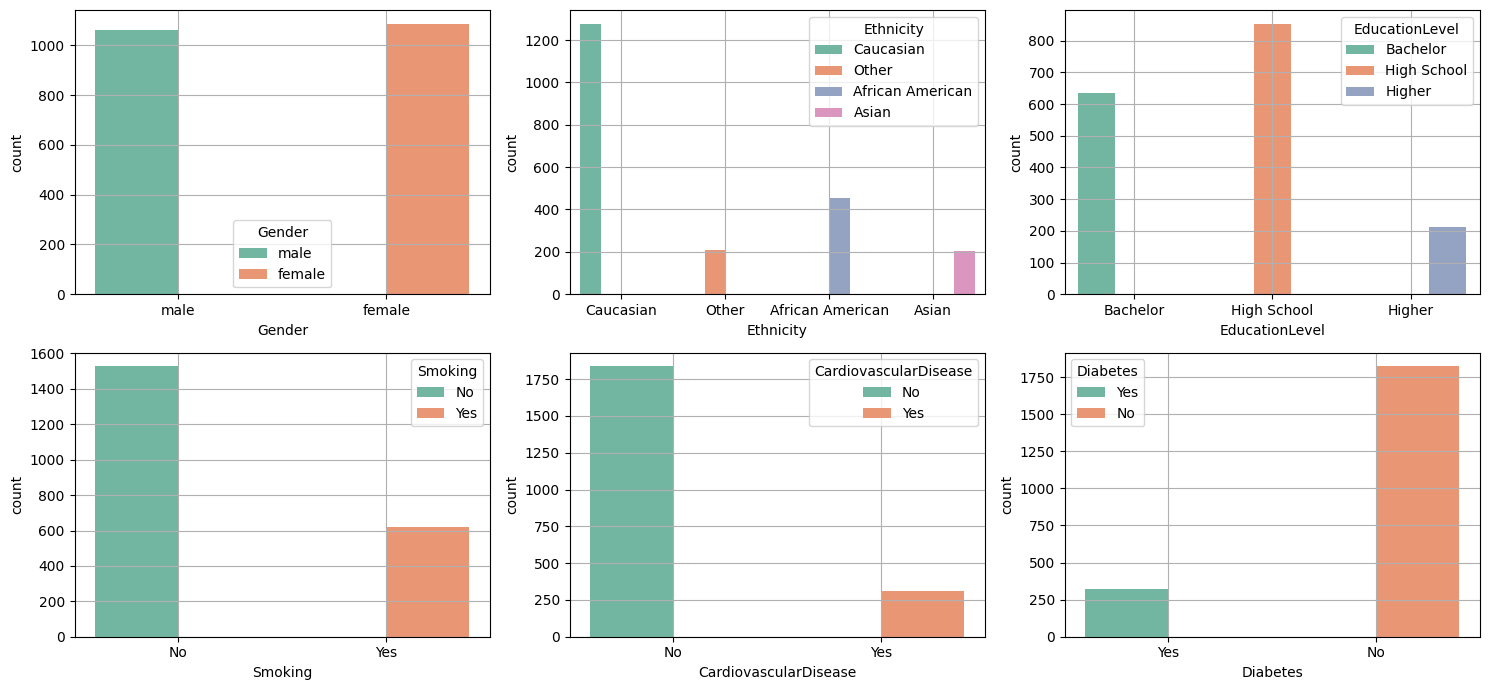

In [8]:
plt.subplots(2,3, figsize=(15,7))
for i, category in enumerate(['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'CardiovascularDisease', 'Diabetes']):
    plt.subplot(2,3,i+1)
    sns.countplot(data=data,x=category,hue=category,palette='Set2')
    plt.grid(True)
plt.tight_layout()
plt.show()

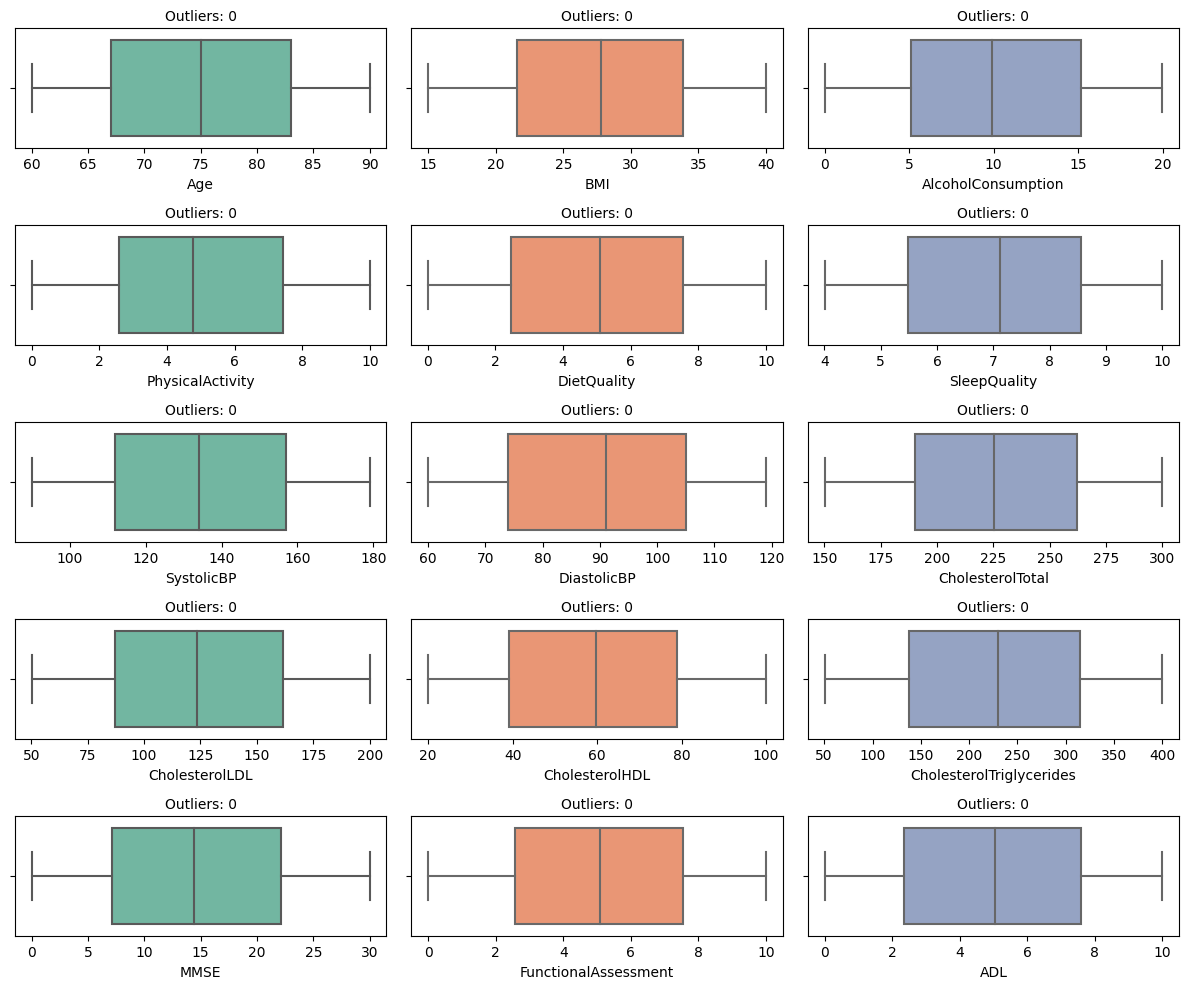

In [ ]:
# Plot boxplots with outliers marked for numeric data
plt.figure(figsize=(12,10))
z_score_threshold = 1.5
for i, col in enumerate(numeric_features):
    z_score = stats.zscore(data[col])
    outliers = np.where(np.abs(z_score) > z_score_threshold)
    plt.subplot(5,3,i+1)
    sns.boxplot(data=data,x=col,showfliers=True,color=custom_palette[i%3])
    plt.title(f'Outliers: {len(outliers[0])}', fontsize=10)
plt.tight_layout()
plt.show()

It is evident from the box plots and z_score thresholding that there are no outliers.

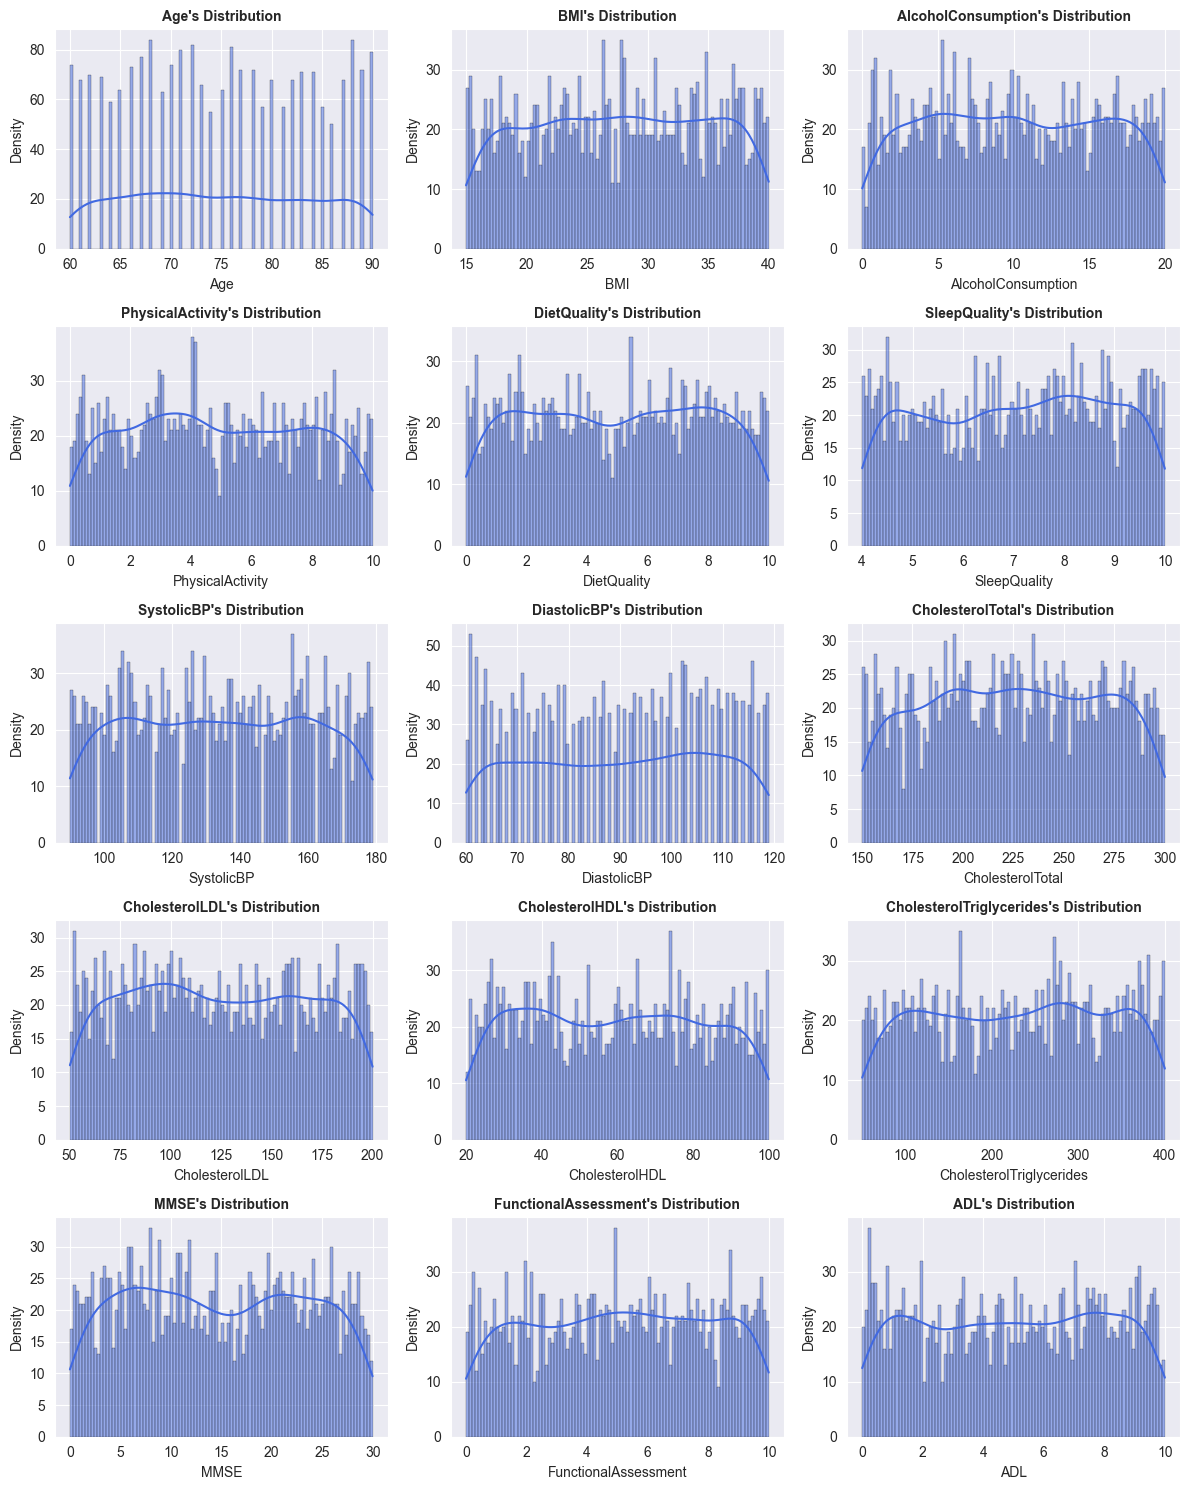

In [10]:
plt.figure(figsize=(12,15))
sns.set_style('darkgrid')
for i, var in enumerate(numeric_features):
    plt.subplot(5, 3, i+1)
    sns.histplot(data[var],bins=100,kde=True,color='royalblue',edgecolor='black')
    plt.title(f"{var}'s Distribution",fontsize=10,weight="bold")
    plt.xlabel(var, fontsize=10)
    plt.ylabel("Density", fontsize=10)
plt.tight_layout()
plt.show()

-------------------------------------------------- 
 Box plot seperated by diagnosis
 --------------------------------------------------


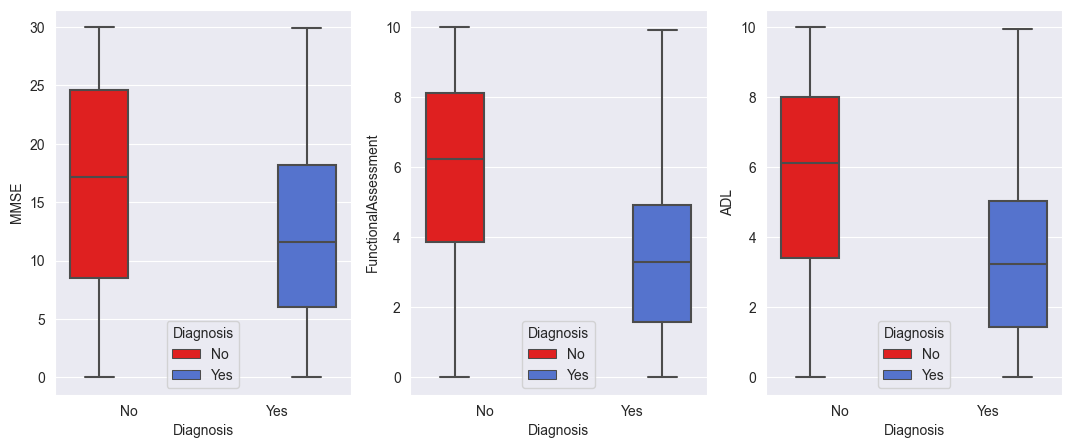

-------------------------------------------------- 
 Scatter plot with Regression line to understand a general trend 
 --------------------------------------------------


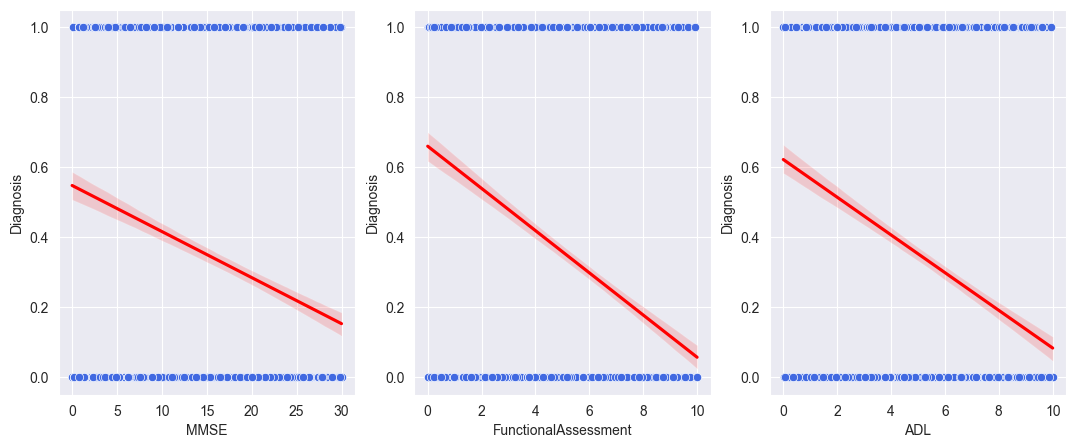

In [11]:
plt.figure(figsize=(13,5))

print('-'*50,'\n','Box plot seperated by diagnosis\n','-'*50)
for i, y in enumerate(numeric_features[-3:]):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=data,x='Diagnosis',y=y, hue='Diagnosis', palette=['red','royalblue'])
plt.show()
target = data['Diagnosis'].replace({'Yes': 1, 'No': 0})
plt.figure(figsize=(13,5))
sns.set_style('darkgrid')
print('-'*50,'\n','Scatter plot with Regression line to understand a general trend \n','-'*50)
for i, y in enumerate(numeric_features[-3:]):
    plt.subplot(1,3,i+1)
    sns.scatterplot(x=data[y],y=target, color='royalblue')
    sns.regplot(x=data[y],y=target, scatter=False, color='red')
plt.show()

There is a clear correlation here. Lower of any of these values might indicate a positive diagnisis

In [12]:
binary_mapping = {'Yes': 1, 'No': 0}
binary_features = ['Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']

for feature in binary_features:
    data[feature] = data[feature].replace(binary_mapping)

EducationLevel_encoder = {'None': 0, 'High School': 1, 'Bachelor': 2, 'Higher': 3}
data['EducationLevel'] = data['EducationLevel'].replace(EducationLevel_encoder)

Ethnicity_encoder = {'Caucasian': 0, 'African American': 1, 'Asian': 2, 'Other': 3}
data['Ethnicity'] = data['Ethnicity'].replace(Ethnicity_encoder)

Gender_encoder = {'male': 0, 'female': 1}
data['Gender'] = data['Gender'].replace(Gender_encoder)

data['EducationLevel'].fillna(data['EducationLevel'].mode()[0], inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   float64
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

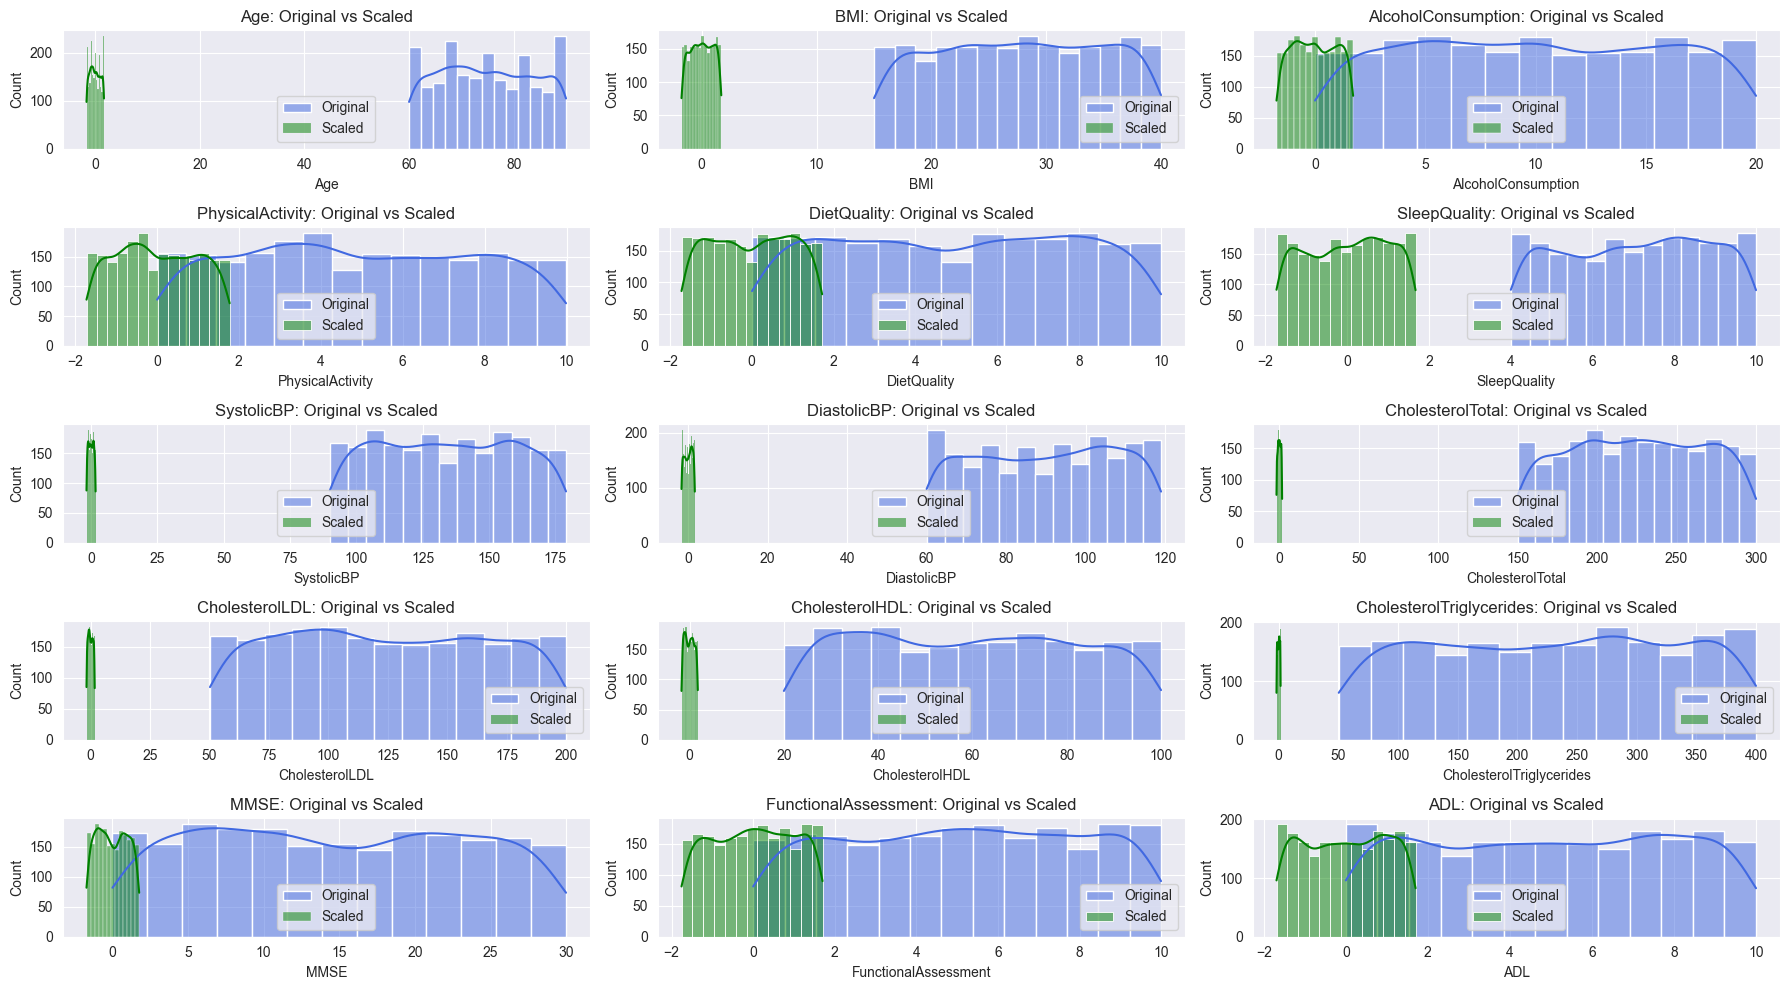

In [13]:
# Normalizing selected numerical columns in the dataset using StandardScaler, 
# compares the distributions of the original and scaled features with overlaid histograms, 
# and visualizes them in a grid layout to evaluate the effect of scaling.
from sklearn.preprocessing import StandardScaler

df_original = data.copy()

columns_to_normalize = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
    'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
    'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL'
]

features_to_normalize = df_original[columns_to_normalize]

scaler = StandardScaler()

normalized_features = scaler.fit_transform(features_to_normalize)

df_scaled = df_original.copy()
df_scaled[columns_to_normalize] = normalized_features

n_cols = 3
n_rows = len(columns_to_normalize) // n_cols + int(len(columns_to_normalize) % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))

axes = axes.flatten()

for i, col in enumerate(columns_to_normalize):
    sns.histplot(df_original[col], ax=axes[i], kde=True, color='royalblue', label='Original')
    sns.histplot(df_scaled[col], ax=axes[i], kde=True, color='green', label='Scaled')

    axes[i].set_title(f'{col}: Original vs Scaled')
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

data_scaled = df_scaled

In [14]:
# Applying PCA to reduce the dimensions of cholesterol-related and blood pressure-related features into single components, integrates these new components ('Cholesterol' and 'BloodPressure')
from sklearn.decomposition import PCA
chalestrol_cols = data_scaled[['CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']]
bp_cols = data_scaled[['SystolicBP', 'DiastolicBP']]

pca = PCA(n_components=1)

data_scaled['Cholesterol'] = pca.fit_transform(chalestrol_cols)
data_scaled['BloodPressure'] = pca.fit_transform(bp_cols)
data_scaled_cleaned = data_scaled.drop(columns=['SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides','DoctorInCharge','PatientID'])

data_scaled_cleaned.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Cholesterol,BloodPressure
0,-0.212368,0,0,2.0,-0.655225,0,0.565923,0.492525,-1.253593,1.119918,...,0,-1.104434,0,0,0,1,0,0,-0.035125,0.506707
1,1.567757,0,0,1.0,-0.114751,0,-0.954895,0.945093,-1.538442,0.056836,...,0,-0.810601,0,0,0,0,1,0,0.237005,1.564238
2,-0.212368,0,3,1.0,-1.366428,0,1.653006,1.023896,-1.088855,1.487380,...,0,0.724491,0,1,0,1,0,0,0.612607,-0.090225
3,-0.101111,1,0,1.0,0.851625,1,0.376930,1.227995,0.839804,0.760833,...,1,0.508044,0,0,0,0,0,0,-1.323060,-0.567883
4,1.567757,0,0,1.0,-0.961607,0,1.461793,0.486696,-1.443293,-0.824566,...,0,-1.684679,0,0,1,1,0,0,-0.595634,0.005851


In [15]:
from sklearn.model_selection import train_test_split
X = data_scaled_cleaned.drop(columns=['Diagnosis'])
y = data_scaled_cleaned['Diagnosis']

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
# Initializing five classification models (Logistic Regression, Random Forest, K-Nearest Neighbors, Decision Tree, and Support Vector Machine), and generates predictions on the test data using each trained model.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
decision_tree_model = DecisionTreeClassifier()
svm_model = SVC()

logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

logistic_pred = logistic_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
decision_tree_pred = decision_tree_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

In [ ]:
# Calculate and store evaluation metrics (accuracy, confusion matrix, classification report) for all models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, logistic_pred),
    'Random Forest': accuracy_score(y_test, random_forest_pred),
    'K-Nearest Neighbors': accuracy_score(y_test, knn_pred),
    'Decision Tree': accuracy_score(y_test, decision_tree_pred),
    'SVM': accuracy_score(y_test, svm_pred)
    }

cnf_matrices = {
    'Logistic Regression': confusion_matrix(y_test, logistic_pred),
    'Random Forest': confusion_matrix(y_test, random_forest_pred),
    'K-Nearest Neighbors': confusion_matrix(y_test, knn_pred),
    'Decision Tree': confusion_matrix(y_test, decision_tree_pred),
    'SVM': confusion_matrix(y_test, svm_pred)
    }

class_reports = {
    'Logistic Regression': classification_report(y_test, logistic_pred, output_dict=True),
    'Random Forest': classification_report(y_test, random_forest_pred, output_dict=True),
    'K-Nearest Neighbors': classification_report(y_test, knn_pred, output_dict=True),
    'Decision Tree': classification_report(y_test, decision_tree_pred, output_dict=True),
    'SVM': classification_report(y_test, svm_pred, output_dict=True)
    }

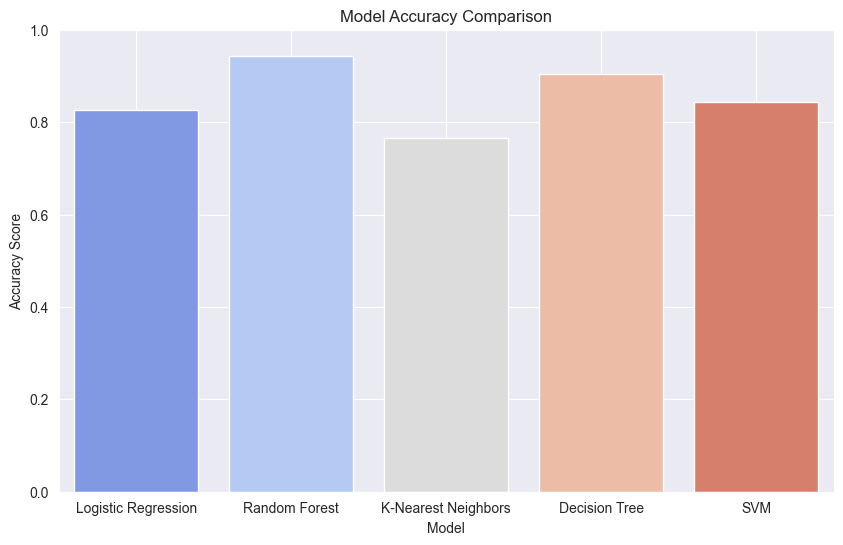

In [18]:
# Create DataFrame and visualize model accuracy comparison using a bar plot with custom styling
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])

accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette=sns.color_palette("coolwarm", len(accuracy_df)))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.xticks()
plt.grid(True)
plt.show()

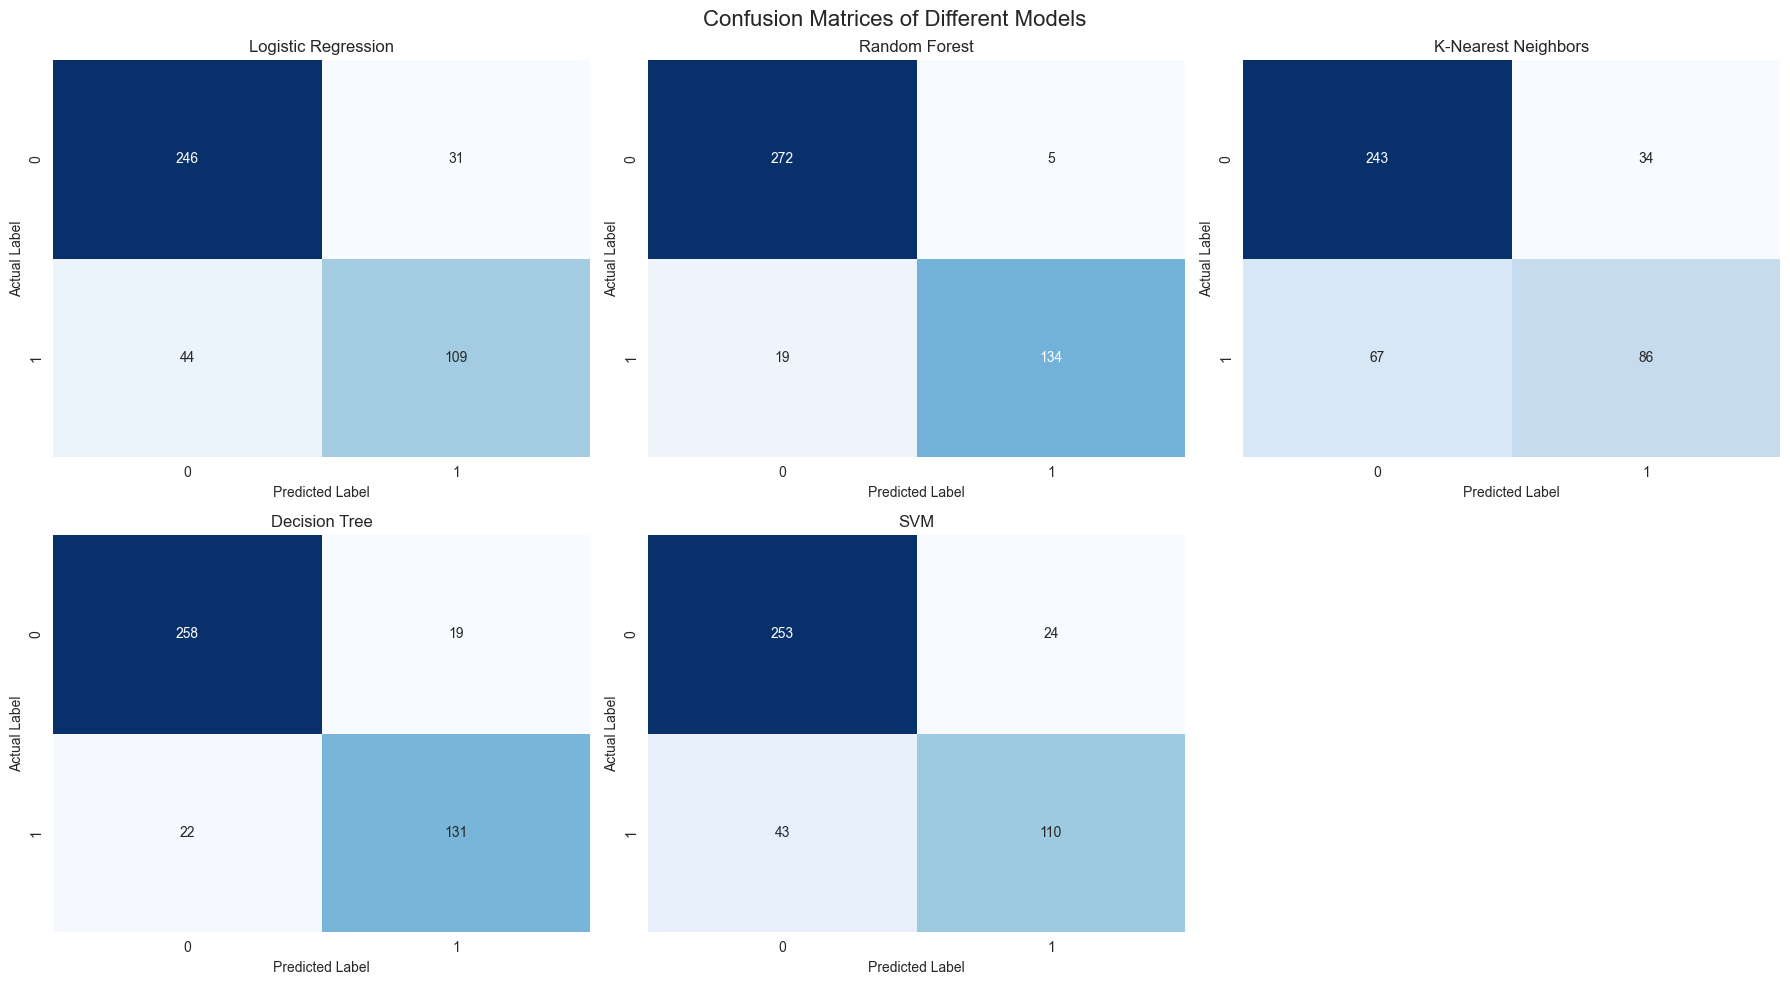

In [28]:
# Generate subplot grid of confusion matrix heatmaps for each model's predictions, with customized layout and labeling
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confusion Matrices of Different Models', fontsize=16)

axes = axes.ravel()

for i, (model, cm) in enumerate(cnf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(model)
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("Actual Label")

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

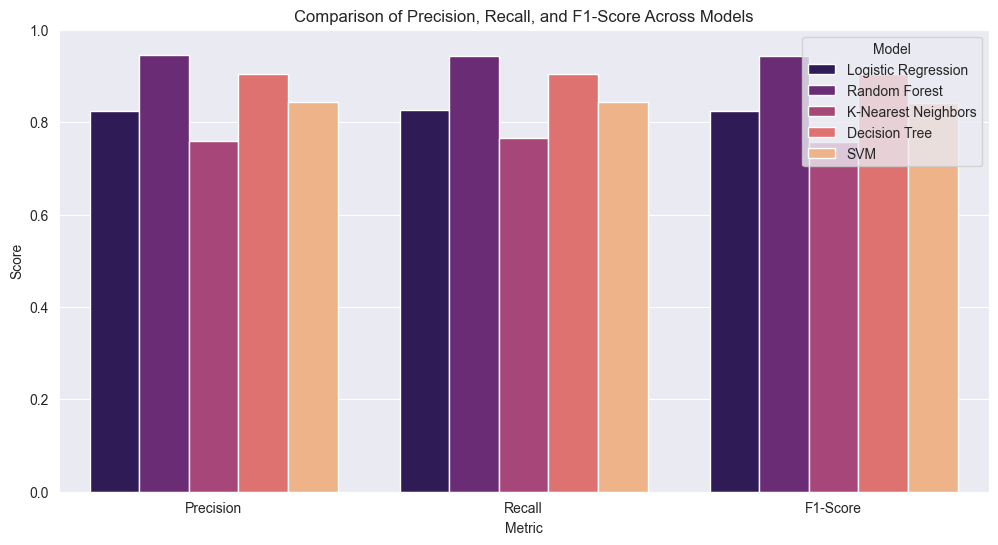

In [20]:
# Transform classification report data and create grouped bar plot comparing precision, recall, and F1-score metrics across all models
summary_data = {
    model: {
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    }
    for model, report in class_reports.items()
}

summary_df = pd.DataFrame(summary_data).T

summary_long_df = summary_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
summary_long_df.rename(columns={'index': 'Model'}, inplace=True)

colors = sns.color_palette("magma", len(summary_df))

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=summary_long_df, palette=colors)
plt.title('Comparison of Precision, Recall, and F1-Score Across Models')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.show()

In [21]:
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])
accuracy_df['Accuracy'] = accuracy_df['Accuracy'].round(4) 

accuracy_df

,Model,Accuracy
0,Logistic Regression,0.8256
1,Random Forest,0.9442
2,K-Nearest Neighbors,0.7651
3,Decision Tree,0.9047
4,SVM,0.8442


**We can Use Grid search cv to ferform 5 fold cross validation and find the best suited hyperparameters**

In [22]:
metrics_data = {'Model': [],'Precision': [],'Recall': [],'F1-Score': []}

for model, report in class_reports.items():
    metrics_data['Model'].append(model)
    metrics_data['Precision'].append(round(report['weighted avg']['precision'], 2))
    metrics_data['Recall'].append(round(report['weighted avg']['recall'], 2))
    metrics_data['F1-Score'].append(round(report['weighted avg']['f1-score'], 2))

metrics_df = pd.DataFrame(metrics_data)

metrics_df

,Model,Precision,Recall,F1-Score
0,Logistic Regression,0.82,0.83,0.82
1,Random Forest,0.95,0.94,0.94
2,K-Nearest Neighbors,0.76,0.77,0.76
3,Decision Tree,0.90,0.90,0.90
4,SVM,0.84,0.84,0.84


In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200, 300],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10, 20],
}
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.9450262915379195


In [24]:
from sklearn.model_selection import cross_val_score

print("Default Model Accuracy Scores:", accuracy_scores['Random Forest']*100)

best_params = grid_search.best_params_
fine_tuned_rf = RandomForestClassifier(random_state=42, **best_params)
fine_tuned_scores = cross_val_score(fine_tuned_rf, X, y, cv=5, scoring='accuracy')

print("Fine-Tuned Model Accuracy Scores:", fine_tuned_scores)
print("Fine-Tuned Model Max Accuracy:", fine_tuned_scores.max()*100)

Default Model Accuracy Scores: 94.41860465116278
Fine-Tuned Model Accuracy Scores: [0.98604651 0.98372093 0.9744186  0.9744186  0.80652681]
Fine-Tuned Model Max Accuracy: 98.6046511627907


In [ ]:
endtime = time.time()

In [ ]:
print(f"Total time taken: {round(endtime - starttime,2)} seconds")

Total time taken: 56.29 seconds
